In [4]:
import pandas as pd 
import yfinance as yf
import numpy as np

import sys
import os
# Add the parent directory to the sys.path
sys.path.append(os.path.join(os.path.dirname('Practice'), '..'))

from Practice import project_tests

## Stock Universe 

Get the stocks from S&P 500 that were there in 2018. We choose this year to avoid Covid pandemic in 2020

In [28]:
import yfinance as yf
import pandas as pd

# Define a function to get market cap for a list of tickers
def get_market_caps(tickers):
    """ 
    Parameters:
    tickers : list
        List of tickers
    Returns:
    market_caps : dict
        Dictionary with market cap for each ticker
    """
    market_caps = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            market_cap = stock.info['marketCap']
            market_caps[ticker] = market_cap
        except Exception as e:
            pass
    return market_caps

# List of S&P 500 tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=828491336')[0]['Ticker symbol'].tolist()

# Get market caps for the tickers
market_caps = get_market_caps(sp500_tickers)

# Create a DataFrame and sort by market cap
market_caps_df = pd.DataFrame(market_caps.items(), columns=['Ticker', 'MarketCap'])
market_caps_df = market_caps_df.sort_values(by='MarketCap', ascending=False)

# Get the top 200 companies by market cap
top_200_companies = market_caps_df.head(200)

# Save to a CSV file
top_200_companies.to_csv('top_200_companies_by_market_cap.csv', index=False)

print("Top 200 companies by market cap saved to 'top_200_companies_by_market_cap.csv'")


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATVI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATVI&crumb=cRilF3%2F00Cc
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=cRilF3%2F00Cc
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARNC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARNC&crumb=cRilF3%2F00Cc
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DISH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.

Top 200 companies by market cap saved to 'top_200_companies_by_market_cap.csv'


In [8]:
# read the csv file
top_200_companies = pd.read_csv('top_200_companies_by_market_cap.csv')

In [6]:
top_200_companies.columns

Index(['Ticker', 'MarketCap'], dtype='object')

In [9]:
def get_data(tickers, start="2018-01-01", end="2020-01-01"):
    """
    Parameters:
    tickers : list
        List of tickers
    start : str
        Start date for data retrieval
    end : str
        End date for data retrieval
    Returns:
    data : pandas.DataFrame
        Dataframe with stock Adj Close for each ticker
    """
    data = yf.download(tickers, start=start, end=end,progress=False)['Adj Close']
    return data

close_prices = get_data(top_200_companies['Ticker'].tolist())


In [10]:
close_prices.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,64.40124512,40.61589050,72.92351532,52.29357529,139.22398376,177.69999695,79.77661896,101.14105988,107.12000275,57.49565506,...,152.91000366,37.79150009,49.70184708,50.62655258,76.70401001,21.15681648,29.33925438,62.13377762,72.57662964,68.44865417
2018-01-03,66.03983307,40.60881805,74.06466675,52.40920639,139.86657715,181.03999329,80.76632690,102.23977661,109.37999725,57.01130295,...,152.00999451,37.01490784,49.78723526,51.01604843,77.81761932,21.74111176,29.59518242,63.35409546,72.51438141,68.76340485
2018-01-04,65.54442596,40.79742813,73.64228058,52.32025528,141.52272034,183.22000122,80.67795563,103.21639252,112.06999969,56.33637619,...,153.07000732,37.13492966,48.71604538,51.65416718,78.48578644,22.11478043,29.62195778,63.44176483,73.25257874,69.17351532
2018-01-05,66.59238434,41.26193237,74.92427063,52.47147751,142.69015503,185.33999634,81.00492096,103.15534973,110.83999634,56.21728134,...,155.69000244,37.05023193,48.41331100,52.00223160,78.38775635,22.05364227,29.79753304,63.39062119,73.67951202,69.96511078
2018-01-08,66.73529816,41.10868073,73.72380066,52.32025528,143.83038330,185.03999329,81.14630127,102.84145355,111.41999817,56.70957184,...,156.88999939,36.98668671,48.58408356,51.41383743,78.44122314,22.13516617,30.23797035,63.67563629,73.80403137,70.80437469


In [15]:
# resample prices to get month end prices
def get_month_end_prices(close_prices,freq='ME'):
    """ 
    Parameters:
    prices : DataFrame
        Prices for each ticker and date
    Returns:
    prices_resampled : DataFrame
        Prices for each ticker and month end date
    """
    prices_resampled = close_prices.resample(freq).last()
    return prices_resampled

prices_month_end = get_month_end_prices(close_prices, freq='ME')


In [17]:

project_tests.test_resample_prices(get_month_end_prices)

Tests Passed


/tmp/ipykernel_2986353/457333618.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  prices_resampled = close_prices.resample(freq).last()


## Momentum Strategy

For now lets consider the log return for each month of a ticker as momentum indicator. We get top 50 and bottom 50performers for each month. We go long on top performers and short on bottom performers with equal money allocation.

In [18]:
# get log returns for monthly data
def get_monthly_log_returns(prices):
    """ 
    Parameters
    ----------
    prices : DataFrame
        Close prices for each ticker and date
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    log_returns = np.log(prices).diff()
    return log_returns

monthly_close_returns = get_monthly_log_returns(prices_month_end)
monthly_close_returns.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.06818596,0.06596111,0.03166244,-0.02988217,0.00192700,0.04583947,-0.01900829,-0.06958252,0.01587402,-0.03797588,...,-0.00504655,-0.12450991,-0.11722558,-0.11288206,-0.02415014,-0.12289313,-0.16916259,-0.13187068,-0.03406457,0.05242651
2018-03-31,-0.02494785,-0.05980385,-0.20193773,-0.00681911,-0.04776581,0.03269263,0.01600128,-0.01059938,0.06676003,0.04487589,...,-0.01854102,0.00167431,0.03610244,-0.10838967,-0.02035075,-0.09787713,-0.00567719,-0.01503177,0.04504988,0.03224727
2018-04-30,-0.01526163,-0.01513374,0.03017986,-0.02552664,-0.00631149,0.02522526,-0.04236422,0.03973568,0.00254493,0.02006275,...,-0.06214432,0.04399785,-0.01835586,-0.00862305,-0.03422139,0.03439736,-0.00574879,0.04122419,0.02287713,0.00110760
2018-05-31,-0.05986430,0.12674200,0.02445266,0.05684321,0.02958443,0.11770278,0.10664196,0.09632612,0.02509939,-0.02017548,...,0.00546945,-0.03463547,0.09143784,0.04582515,0.01731763,0.04298084,-0.06298728,0.05399417,-0.06422631,0.00263160


In [19]:
project_tests.test_compute_log_returns(get_monthly_log_returns)

Tests Passed


<Axes: xlabel='Date', ylabel='AAPL monthly log returns'>

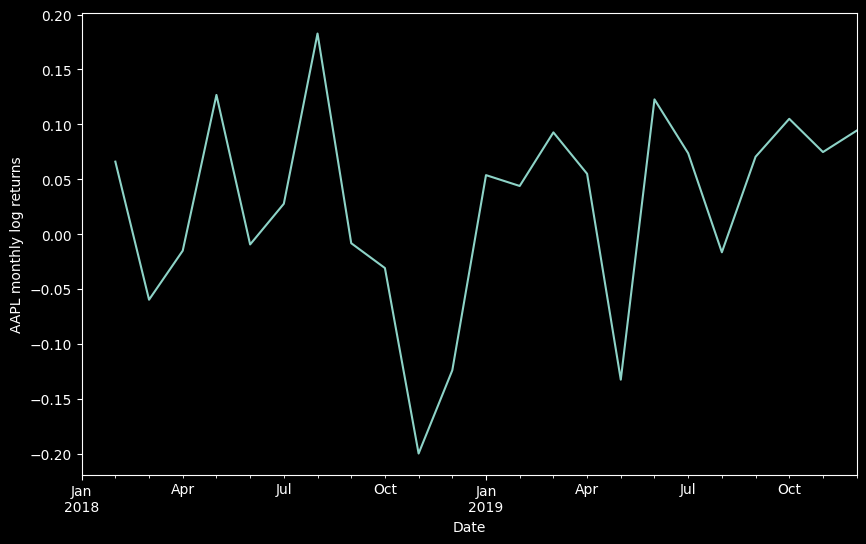

In [20]:
monthly_close_returns.loc[:, 'AAPL'].plot(figsize=(10, 6),ylabel='AAPL monthly log returns')

In [21]:
# define function that give shifted returns for each ticker
def shift_returns(returns, shift_n):
    """ 
    Parameters:
    returns : pd.DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    Returns: 
    shifted: pd.DataFrame
        Shifted returns for each ticker
    """
    shifted = returns.shift(shift_n)
    return shifted

# shift returns
prev_monthly_close_returns = shift_returns(monthly_close_returns, 1)
lookahead_returns = shift_returns(monthly_close_returns, -1)

prev_monthly_close_returns.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,-0.06818596,0.06596111,0.03166244,-0.02988217,0.00192700,0.04583947,-0.01900829,-0.06958252,0.01587402,-0.03797588,...,-0.00504655,-0.12450991,-0.11722558,-0.11288206,-0.02415014,-0.12289313,-0.16916259,-0.13187068,-0.03406457,0.05242651
2018-04-30,-0.02494785,-0.05980385,-0.20193773,-0.00681911,-0.04776581,0.03269263,0.01600128,-0.01059938,0.06676003,0.04487589,...,-0.01854102,0.00167431,0.03610244,-0.10838967,-0.02035075,-0.09787713,-0.00567719,-0.01503177,0.04504988,0.03224727
2018-05-31,-0.01526163,-0.01513374,0.03017986,-0.02552664,-0.00631149,0.02522526,-0.04236422,0.03973568,0.00254493,0.02006275,...,-0.06214432,0.04399785,-0.01835586,-0.00862305,-0.03422139,0.03439736,-0.00574879,0.04122419,0.02287713,0.00110760


In [22]:
project_tests.test_shift_returns(shift_returns)

Tests Passed


In [30]:
# function to get top industries for a given date and sector

def get_top_n(prev_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """

    # interate over each date and get top industries for each date
    top_stocks = pd.DataFrame(columns=prev_returns.columns)
    for date, tickers in prev_returns.iterrows():
        
        if(tickers.dropna().shape[0]==0):
            signal = [0 for i in range(len(tickers))]
        else:
            # get top tickers for the date
            top_tickers = tickers.loc[:].nlargest(top_n)
            # print(tickers.tolist(),top_tickers)
            # print(top_tickers.index.tolist())
            # for top_stocks tickers put the value 1 for rest 0
            signal = [1 if ticker in top_tickers.index.tolist() else 0 for ticker in tickers.index.tolist()]

        top_stocks.loc[date] = signal
        
    return top_stocks
  
# get long and short holdings
long_df = get_top_n(prev_monthly_close_returns, 50)
short_df = get_top_n(prev_monthly_close_returns, -50)


In [31]:
project_tests.test_get_top_n(get_top_n)

Tests Passed


In [125]:
# function to calculate portfolio returns

def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    """
    Compute expected returns for the portfolio, assuming equal investment in each long/short stock.
    
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int
        The number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """
    
    
    return None




In [ ]:
lookahead_returns